# Cost of health insurance solution

In [19]:
# Your code here
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1. Reading the processed data set

In [20]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. age. Age of primary beneficiary (numeric)
2. sex. Gender of the primary beneficiary (categorical)
3. bmi. Body mass index (numeric)
4. children. Number of children/dependents covered by health insurance (numeric)
5. smoker. Is the person a smoker? (categorical)
6. region. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
7. charges. Health insurance premium (numerical)

In [21]:
# Obtain dimensions
data.shape

(1338, 7)

In [22]:
print(f"The DataFrame contains {len(data)} records (rows) and {len(data.columns)} variables (columns).")

The DataFrame contains 1338 records (rows) and 7 variables (columns).


In [23]:
# Obtain information about data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
columns=data.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [25]:
categorical_columns=["sex", "smoker", "region"]
df_categorical_columns=data[categorical_columns]
df_categorical_columns.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [26]:
numerical_columns=['age', 'bmi', 'children', 'charges']
df_numerical_columns=data[numerical_columns]
df_numerical_columns.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [27]:
data_c=data.copy()
data_c.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
sex=data_c["sex"].value_counts()
print(f"{sex}")

sex
male      676
female    662
Name: count, dtype: int64


In [29]:
smoker=data_c["smoker"].value_counts()
print(f"{smoker}")

smoker
no     1064
yes     274
Name: count, dtype: int64


In [30]:
region=data_c["region"].value_counts()
print(f"{region}")

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [32]:
# Factorize the Room Type and Neighborhood Data
data_c["sex_n"] = pd.factorize(data_c["sex"])[0]
data_c["smoker_n"] = pd.factorize(data_c["smoker"])[0]
data_c["region_n"] = pd.factorize(data_c["region"])[0]

In [33]:
data_c.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


In [35]:
data_c_columns=data_c.columns
data_c_columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_n',
       'smoker_n', 'region_n'],
      dtype='object')

In [39]:
data_c_numerical_columns=['charges', 'age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n']

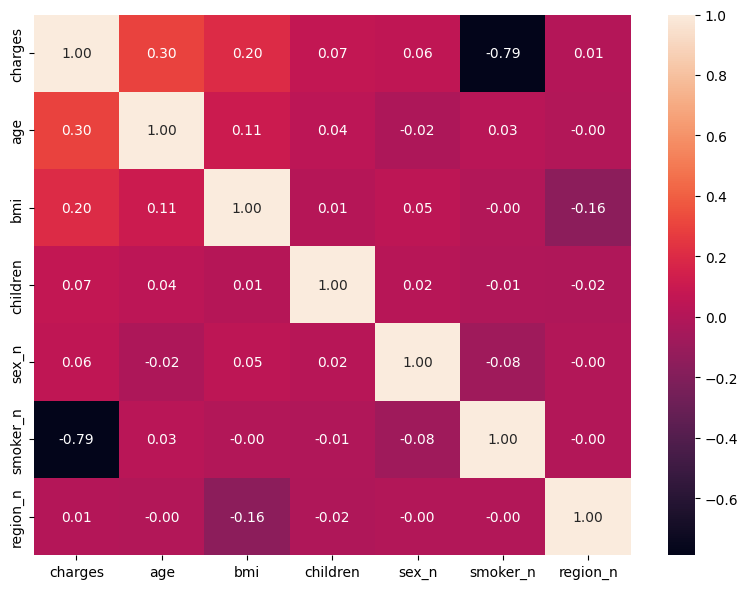

In [41]:
fig, axes = plt.subplots(figsize=(8, 6))

sns.heatmap(data_c[data_c_numerical_columns].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

In [42]:
# Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data_c[num_variables])

total_data_scal = pd.DataFrame(scal_features, index=data_c.index, columns=num_variables)

total_data_scal["charges"] = data_c["charges"]

total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,16884.92400
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,1725.55230
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,4449.46200
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,21984.47061
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,3866.85520


In [44]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 3)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,smoker_n
0,0.608696,0.107345,1.0
1,0.630435,0.224913,1.0
2,0.739130,0.239440,1.0
3,0.456522,0.493947,1.0
4,0.782609,0.148238,1.0


In [45]:
X_test_sel.head()

,age,bmi,smoker_n
0,0.586957,0.247915,1.0
1,0.391304,0.378262,1.0
2,1.000000,0.293920,0.0
3,0.608696,0.263250,1.0
4,0.021739,0.429379,0.0


In [47]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

### Linear Regression model

In [48]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,smoker_n,charges
0,0.608696,0.107345,1.0,9193.83850
1,0.630435,0.224913,1.0,8534.67180
2,0.739130,0.239440,1.0,27117.99378
3,0.456522,0.493947,1.0,8596.82780
4,0.782609,0.148238,1.0,12475.35130


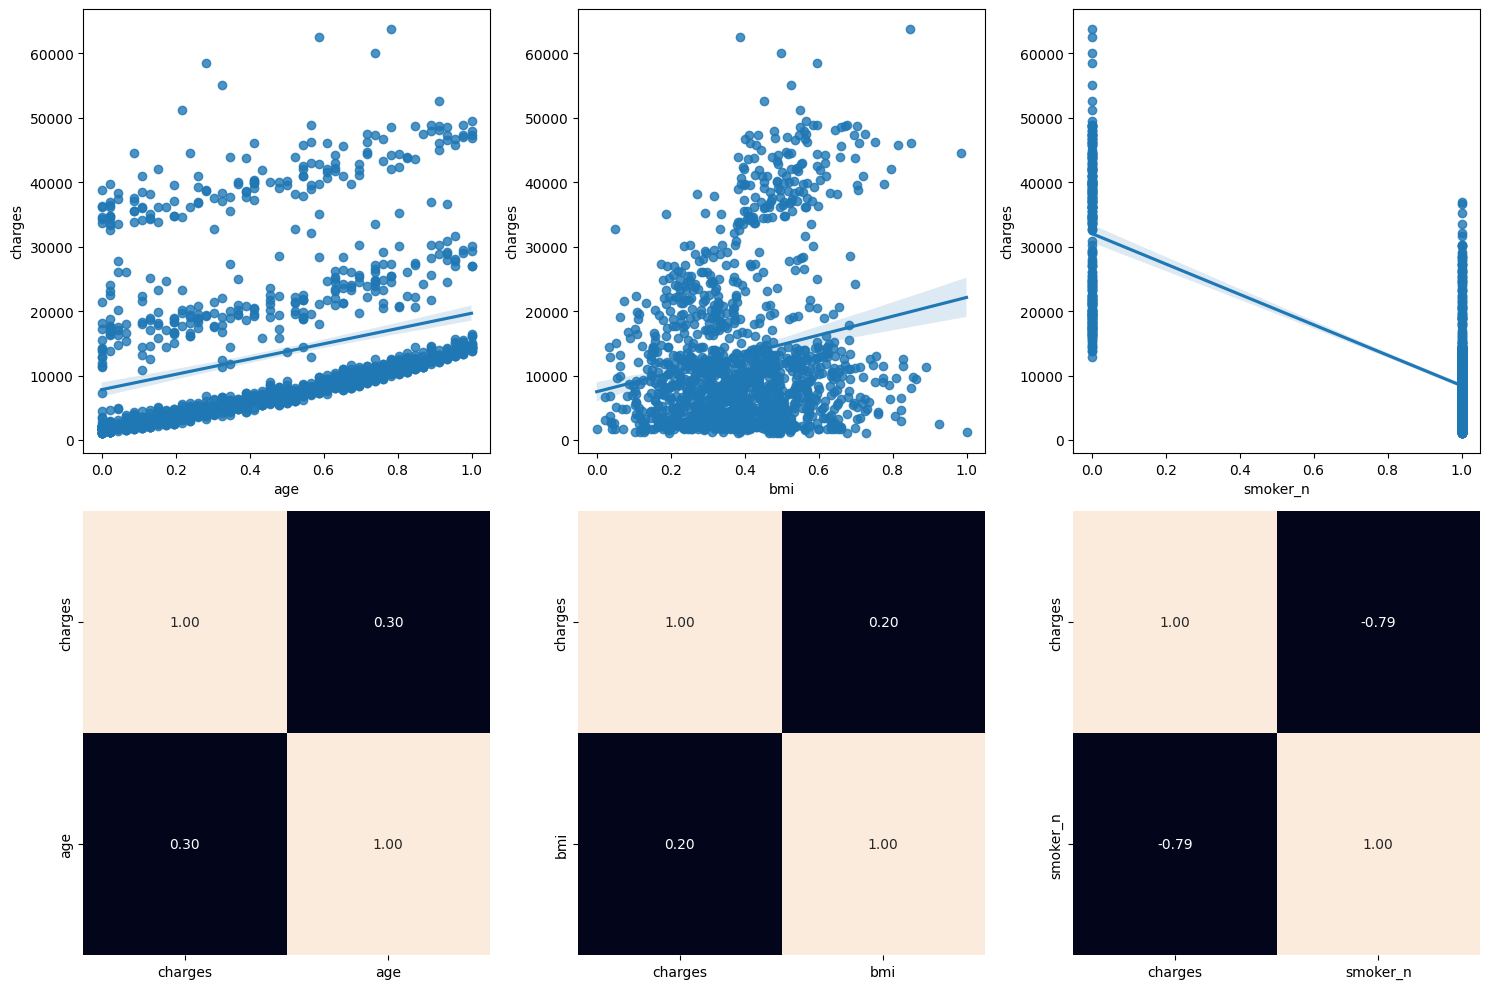

In [54]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))
data_c = pd.concat([train_data, test_data])

sns.regplot(data = data_c, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(data_c[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = data_c, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(data_c[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = data_c, x = "smoker_n", y = "charges", ax = axis[0, 2])
sns.heatmap(data_c[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

plt.tight_layout()
plt.show()

In [55]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

### Step 2: Initialization and training of the model

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2, b3): {model.coef_}")

Intercep (a): 21847.09890044787
Coefficients (b1, b2, b3): [ 11932.86941266  12134.15512912 -23675.37184666]


### Step 3: Model prediction

In [59]:
y_pred = model.predict(X_test)
y_pred

array([ 8.18404147e+03,  7.43100100e+03,  3.73464371e+04,  8.62952830e+03,
        2.73166548e+04,  1.11168596e+04,  5.71018530e+02,  1.72685468e+04,
        1.20000791e+03,  1.03691549e+04,  2.77152613e+04,  8.91412866e+03,
        5.47475597e+03,  3.77256063e+04,  4.08905253e+04,  3.68718212e+04,
        1.49361936e+04,  3.61177211e+04,  9.38199609e+03,  3.18988228e+04,
        2.57961333e+03,  1.00891140e+04,  3.14507861e+03,  6.99357366e+03,
        1.04424884e+04,  1.29687423e+04,  1.53152131e+04,  5.22036025e+03,
        9.16805346e+03,  2.80079135e+03,  8.23359765e+03,  1.34678580e+04,
        5.12313156e+03,  2.58718594e+03,  4.83036995e+03,  1.29600084e+04,
        2.35809809e+03,  9.20769841e+03,  3.33341443e+04,  3.27973851e+04,
        2.55746819e+03,  4.23343695e+03,  1.45060874e+04,  1.19088226e+04,
        8.52333022e+03,  1.25747811e+04,  4.71833327e+03,  2.71019342e+03,
        3.48646232e+04,  8.86633842e+03,  1.64851840e+04,  2.54942467e+03,
        1.21901745e+04,  

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 34512843.88022789
R2 Score: 0.7776932310583375
